<a href="https://colab.research.google.com/github/Ratnasari124/Mechine_Learning_Ratnasari/blob/main/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UJIAN TENGAH SEMESTER 2024-2025
# Pembelajaran Mesin

## Anggota Kelompok
1. Ratnasari (2241720007)
2. Muhammad Kemal Nugraha (2241720044)
3. Lalu Immaratul Ardhi Ganeru(2241720169)
4. Muhammad Ariel Saputra (2241720034)


Klasifikasi Neural Network (NN) Pada Data Citra
# Intro

Pada UTS ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Casia-Webface (Data dapat diunduh pada Kaggle).
Anda diperbolehkan melakukan eksplorasi terhadap:
1. Metode pra pengolahan
2. Pemilihan fitur
3. Arsitektur ANN
4. Fungsi Aktiviasi
5. Metric Evaluasi

# Preparation

In [ ]:
'''
    Pada bagian ini Anda dapat memasukkan library yang dibutuhkan
'''
# from google.colab import files
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load Data

In [ ]:
'''
    Pada bagian ini Anda dapat memuat dataset Casia-Webface dan visualisasi data.
'''
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("ntl0601/casia-webface")
print("Path to dataset files:", path)

# Define the image directory (adjust this if your dataset structure is different)
image_dir = os.path.join(path, 'images')  # Assuming images are in a subdirectory called "images"
if not os.path.exists(image_dir):
    print(f"Image directory '{image_dir}' not found. Verify dataset structure.")
else:
    # Display sample images
    sample_images = os.listdir(image_dir)[:5]  # Get the first 5 images

    for img_name in sample_images:
        img_path = os.path.join(image_dir, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(img_name)
            plt.axis('off')  # Hide axes for better view
            plt.show()
        else:
            print(f"Failed to load image: {img_path}")


Path to dataset files: C:\Users\kuhak\.cache\kagglehub\datasets\ntl0601\casia-webface\versions\1
Image directory 'C:\Users\kuhak\.cache\kagglehub\datasets\ntl0601\casia-webface\versions\1\images' not found. Verify dataset structure.


# Preprocessing

In [ ]:
import os
import cv2
import numpy as np

# Tentukan path utama
image_dir = r'C:\Users\kuhak\.cache\kagglehub\datasets\ntl0601\casia-webface\versions\1\casia-webface'
img_size = (128, 128)

# List untuk menyimpan data dan label
images = []
labels = []
max_images = 1000  # Batasan jumlah gambar
count = 0  # Penghitung gambar

# Fungsi untuk memuat dan mengolah gambar
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, img_size) / 255.0
    return img

# Iterasi melalui setiap folder dan gambar di dalamnya
for label_folder in os.listdir(image_dir):
    folder_path = os.path.join(image_dir, label_folder)
    if os.path.isdir(folder_path):  # Pastikan ini folder
        # Hitung jumlah gambar dalam folder
        image_count = sum(1 for img_file in os.listdir(folder_path)
                          if img_file.endswith('.jpg') or img_file.endswith('.png'))

        # Cek apakah jumlah gambar cukup
        if image_count < 100:
            continue  # Lewati folder jika kurang dari 100 gambar

        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            if img_file.endswith('.jpg') or img_file.endswith('.png'):
                img = preprocess_image(img_path)
                images.append(img)
                labels.append(int(label_folder))  # Gunakan nama folder sebagai label
                count += 1
                if count >= max_images:  # Hentikan jika sudah mencapai batas
                    break
        if count >= max_images:
            break

# Konversi ke array numpy
images = np.array(images)
labels = np.array(labels)
print("Total images:", images.shape)
print("Total labels:", labels.shape)

Total images: (1000, 128, 128, 3)
Total labels: (1000,)


In [ ]:
print(len(set(labels)))
print(labels)

4
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 

In [ ]:
num_classes = labels.max() + 1
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Build Model

In [ ]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan input layer, hidden layer, output layer
    2. Menentukan fungsi aktivasi
    3. Compile Model (Menentukan optimizer, loss, metrics)
    3. Proses fitting model
'''
ann = tf.keras.models.Sequential()

ann.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
ann.add(MaxPooling2D(pool_size=(2, 2)))

ann.add(Conv2D(64, (3, 3), activation='relu'))
ann.add(MaxPooling2D(pool_size=(2, 2)))

ann.add(Conv2D(128, (3, 3), activation='relu'))
ann.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten untuk mengubah output 3D menjadi 1D sebelum masuk ke dense layer
ann.add(Flatten())

# Dense Layer
ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.5))

ann.add(Dense(num_classes, activation='softmax'))

d:\Project Kuliah\uts\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann.compile(
    optimizer = 'adamax',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
    )

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = ann.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])
# history = ann.fit(X_train, y_train, batch_size=32, epochs=7, validation_data=(X_test, y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.2335 - loss: 0.4239 - val_accuracy: 0.4350 - val_loss: 0.2480
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.3725 - loss: 0.2998 - val_accuracy: 0.5200 - val_loss: 0.2423
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.3589 - loss: 0.2863 - val_accuracy: 0.5750 - val_loss: 0.2134
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.4619 - loss: 0.2488 - val_accuracy: 0.6250 - val_loss: 0.1946
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.5429 - loss: 0.2303 - val_accuracy: 0.6950 - val_loss: 0.1825
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6396 - loss: 0.2034 - val_accuracy: 0.7450 - val_loss: 0.1476
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7026 - loss: 0.1894 - val_accuracy: 0.7550 - val_loss: 0.1344
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7409 - loss: 0.1538 - val_accuracy: 0.725

# Evaluation

In [ ]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
'''
# Evaluasi model pada data testing
test_loss, test_acc = ann.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}, Test loss: {test_loss:.2f}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9145 - loss: 0.0623
Test accuracy: 0.91, Test loss: 0.07


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


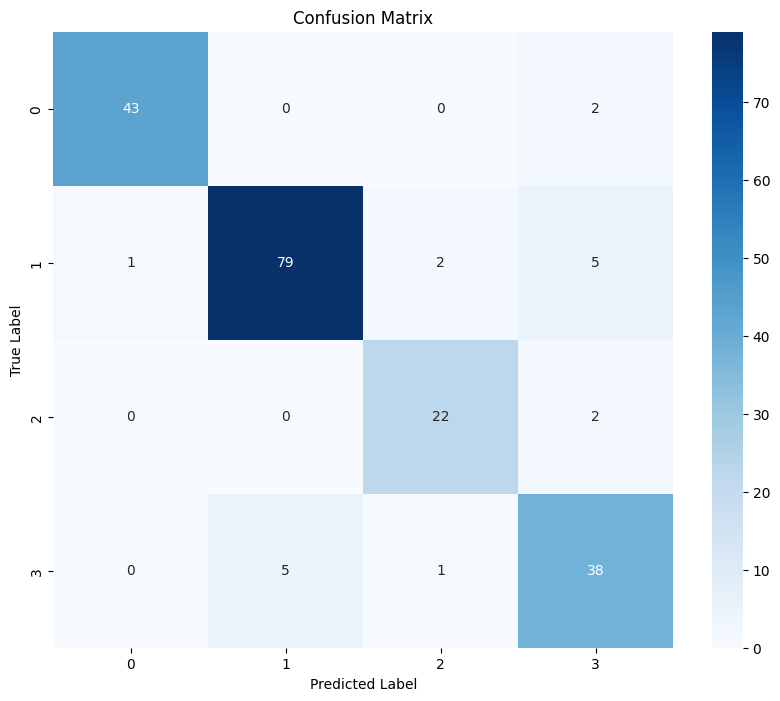

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = ann.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Klasifikasi ke label
y_true = np.argmax(y_test, axis=1)  # Label sebenarnya

# Membuat confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()